In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [223]:
season = 2023

season_url = f"https://www.basketball-reference.com/leagues/NBA_{season}_per_game.html"

tables = pd.read_html(season_url)

In [224]:
df_season = tables[0]
df_season

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1"
1,2.0,Luka Dončić,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1"
2,3.0,Damian Lillard,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3"
3,4.0,Shai Gilgeous-Alexander,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1"
4,5.0,Giannis Antetokounmpo,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,536.0,Deonte Burton,29.0,SAC,PF,2.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
676,537.0,Michael Foster Jr.,20.0,PHI,PF,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
677,538.0,Frank Jackson,24.0,UTA,PG,1.0,0.0,5.0,0.0,3.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
678,539.0,Alondes Williams,23.0,BRK,SG,1.0,0.0,5.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN


In [225]:
#Keep only the top 100 entries
df_season.drop_duplicates(subset=['Player'], keep='first', inplace=True)
df_season

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1"
1,2.0,Luka Dončić,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1"
2,3.0,Damian Lillard,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3"
3,4.0,Shai Gilgeous-Alexander,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1"
4,5.0,Giannis Antetokounmpo,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,536.0,Deonte Burton,29.0,SAC,PF,2.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
676,537.0,Michael Foster Jr.,20.0,PHI,PF,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
677,538.0,Frank Jackson,24.0,UTA,PG,1.0,0.0,5.0,0.0,3.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
678,539.0,Alondes Williams,23.0,BRK,SG,1.0,0.0,5.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN


In [226]:
df_season.drop(df_season.index[100: 541], inplace=True)
df_season.reset_index(inplace=True, drop=True)
df_season

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,...,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1"
1,2.0,Luka Dončić,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1"
2,3.0,Damian Lillard,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3"
3,4.0,Shai Gilgeous-Alexander,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1"
4,5.0,Giannis Antetokounmpo,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,Harrison Barnes,30.0,SAC,PF,82.0,82.0,32.5,4.6,9.6,...,1.1,3.4,4.5,1.6,0.7,0.1,1.0,1.3,15.0,NaN
96,97.0,Malcolm Brogdon,30.0,BOS,PG,67.0,0.0,26.0,5.3,10.9,...,0.6,3.6,4.2,3.7,0.7,0.3,1.5,1.6,14.9,6MOY-1
97,98.0,Immanuel Quickley,23.0,NYK,SG,81.0,21.0,28.9,5.2,11.6,...,0.7,3.4,4.2,3.4,1.0,0.2,1.2,2.0,14.9,6MOY-2
98,99.0,Alperen Şengün,20.0,HOU,C,75.0,72.0,28.9,5.9,10.7,...,3.2,5.8,9.0,3.9,0.9,0.9,2.6,3.4,14.8,NaN


In [227]:
standings_url = f"https://www.basketball-reference.com/leagues/NBA_{season}_standings.html"

tables_team = pd.read_html(standings_url)

In [228]:
df_east = tables_team[0]
df_west = tables_team[1]

In [229]:
df_east['Eastern Conference'] = df_east['Eastern Conference'].str.replace('*', '')
df_west['Western Conference'] = df_west['Western Conference'].str.replace('*', '')
df_east = df_east.rename({'Eastern Conference': 'Team'}, axis=1)
df_west = df_west.rename({'Western Conference': 'Team'}, axis=1)

In [230]:
df_east = df_east[['Team', 'W/L%']]
df_west = df_west[['Team', 'W/L%']]

In [231]:
df_east = df_east.replace({'Milwaukee Bucks': 'MIL',
                 'Boston Celtics': 'BOS',
                 'Philadelphia 76ers': 'PHI',
                 'Cleveland Cavaliers': 'CLE',
                 'New York Knicks': 'NYK',
                 'Brooklyn Nets': 'BRK',
                 'Miami Heat': 'MIA',
                 'Atlanta Hawks': 'ATL',
                 'Toronto Raptors': 'TOR',
                 'Chicago Bulls': 'CHI',
                 'Indiana Pacers': 'IND',
                 'Washington Wizards': 'WAS',
                 'Orlando Magic': 'ORL',
                 'Charlotte Hornets': 'CHO',
                 'Detroit Pistons': 'DET'})

In [232]:
df_west = df_west.replace({'Denver Nuggets': 'DEN',
                 'Memphis Grizzlies': 'MEM',
                 'Sacramento Kings': 'SAC',
                 'Phoenix Suns': 'PHO',
                 'Los Angeles Clippers': 'LAC',
                 'Golden State Warriors': 'GSW',
                 'Los Angeles Lakers': 'LAL',
                 'Minnesota Timberwolves': 'MIN',
                 'New Orleans Pelicans': 'NOP',
                 'Oklahoma City Thunder': 'OKC',
                 'Dallas Mavericks': 'DAL',
                 'Utah Jazz': 'UTA',
                 'Portland Trail Blazers': 'POR',
                 'Houston Rockets': 'HOU',
                 'San Antonio Spurs': 'SAS'})

In [233]:
df_team = pd.concat([df_west, df_east])

In [234]:
df_season = df_season.merge(df_team, how='left', on='Team')
df_season

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,W/L%
0,1.0,Joel Embiid,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,...,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1",0.659
1,2.0,Luka Dončić,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,...,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1",0.463
2,3.0,Damian Lillard,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,...,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3",0.402
3,4.0,Shai Gilgeous-Alexander,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,...,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1",0.488
4,5.0,Giannis Antetokounmpo,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,...,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1",0.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,Harrison Barnes,30.0,SAC,PF,82.0,82.0,32.5,4.6,9.6,...,3.4,4.5,1.6,0.7,0.1,1.0,1.3,15.0,NaN,0.585
96,97.0,Malcolm Brogdon,30.0,BOS,PG,67.0,0.0,26.0,5.3,10.9,...,3.6,4.2,3.7,0.7,0.3,1.5,1.6,14.9,6MOY-1,0.695
97,98.0,Immanuel Quickley,23.0,NYK,SG,81.0,21.0,28.9,5.2,11.6,...,3.4,4.2,3.4,1.0,0.2,1.2,2.0,14.9,6MOY-2,0.573
98,99.0,Alperen Şengün,20.0,HOU,C,75.0,72.0,28.9,5.9,10.7,...,5.8,9.0,3.9,0.9,0.9,2.6,3.4,14.8,NaN,0.268


In [235]:
df_season['W/L%'] = df_season['W/L%'].fillna(0.5)

In [236]:
df_season.drop(['Rk', 'Age', 'Team', 'Pos', 'G', 'GS', 'FG', 'FGA', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TOV', 'PF', 'Awards'],
              axis=1, inplace=True)
df_season

,Player,MP,FG%,TRB,AST,STL,BLK,PTS,W/L%
0,Joel Embiid,34.6,0.548,10.2,4.2,1.0,1.7,33.1,0.659
1,Luka Dončić,36.2,0.496,8.6,8.0,1.4,0.5,32.4,0.463
2,Damian Lillard,36.3,0.463,4.8,7.3,0.9,0.3,32.2,0.402
3,Shai Gilgeous-Alexander,35.5,0.510,4.8,5.5,1.6,1.0,31.4,0.488
4,Giannis Antetokounmpo,32.1,0.553,11.8,5.7,0.8,0.8,31.1,0.707
...,...,...,...,...,...,...,...,...,...
95,Harrison Barnes,32.5,0.473,4.5,1.6,0.7,0.1,15.0,0.585
96,Malcolm Brogdon,26.0,0.484,4.2,3.7,0.7,0.3,14.9,0.695
97,Immanuel Quickley,28.9,0.448,4.2,3.4,1.0,0.2,14.9,0.573
98,Alperen Şengün,28.9,0.553,9.0,3.9,0.9,0.9,14.8,0.268


In [238]:
advanced_url = f"https://www.basketball-reference.com/leagues/NBA_{season}_advanced.html"

tables_adv = pd.read_html(advanced_url)

In [239]:
df_advanced = tables_adv[0]
df_advanced

,Rk,Player,Age,Team,Pos,G,GS,MP,PER,TS%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards
0,1.0,Mikal Bridges,26.0,2TM,SG,83.0,83.0,2963.0,16.8,0.587,...,22.6,4.4,3.1,7.5,0.121,1.5,0.2,1.7,2.8,NaN
1,1.0,Mikal Bridges,26.0,PHO,SF,56.0,56.0,2040.0,14.8,0.574,...,19.2,2.7,2.2,4.9,0.116,0.4,0.6,1.0,1.6,NaN
2,1.0,Mikal Bridges,26.0,BRK,SG,27.0,27.0,923.0,21.3,0.607,...,30.3,1.7,0.8,2.5,0.133,4.0,-0.8,3.3,1.2,NaN
3,2.0,Anthony Edwards,21.0,MIN,SG,79.0,79.0,2842.0,17.4,0.564,...,29.9,0.2,3.6,3.8,0.064,1.0,0.0,1.0,2.1,AS
4,3.0,Zach LaVine,27.0,CHI,SG,77.0,77.0,2768.0,19.0,0.607,...,28.3,4.2,2.9,7.1,0.123,2.7,-0.7,1.9,2.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,536.0,Donovan Williams,21.0,ATL,SG,2.0,0.0,4.0,14.5,0.400,...,52.5,0.0,0.0,0.0,-0.225,-9.1,-6.1,-15.2,0.0,NaN
676,537.0,Chris Silva,26.0,DAL,PF,1.0,0.0,3.0,-2.2,1.000,...,30.1,0.0,0.0,0.0,-0.260,-22.5,-0.1,-22.6,0.0,NaN
677,538.0,Stanley Umude,23.0,DET,SG,1.0,0.0,2.0,65.6,0.532,...,40.0,0.0,0.0,0.0,0.626,15.9,32.7,48.6,0.0,NaN
678,539.0,Michael Foster Jr.,20.0,PHI,PF,1.0,0.0,1.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.010,-7.2,-1.9,-9.2,0.0,NaN


In [240]:
df_advanced.drop_duplicates(subset=['Player'], keep='first', inplace=True)
df_advanced

,Rk,Player,Age,Team,Pos,G,GS,MP,PER,TS%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards
0,1.0,Mikal Bridges,26.0,2TM,SG,83.0,83.0,2963.0,16.8,0.587,...,22.6,4.4,3.1,7.5,0.121,1.5,0.2,1.7,2.8,NaN
3,2.0,Anthony Edwards,21.0,MIN,SG,79.0,79.0,2842.0,17.4,0.564,...,29.9,0.2,3.6,3.8,0.064,1.0,0.0,1.0,2.1,AS
4,3.0,Zach LaVine,27.0,CHI,SG,77.0,77.0,2768.0,19.0,0.607,...,28.3,4.2,2.9,7.1,0.123,2.7,-0.7,1.9,2.7,NaN
5,4.0,Nikola Vučević,32.0,CHI,C,82.0,82.0,2746.0,19.1,0.594,...,21.9,3.9,4.4,8.3,0.145,1.9,0.7,2.7,3.2,NaN
6,5.0,Julius Randle,28.0,NYK,PF,77.0,77.0,2737.0,20.3,0.581,...,29.5,5.0,3.1,8.1,0.142,3.9,-0.2,3.7,3.9,"CPOY-14,AS,NBA3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,536.0,Donovan Williams,21.0,ATL,SG,2.0,0.0,4.0,14.5,0.400,...,52.5,0.0,0.0,0.0,-0.225,-9.1,-6.1,-15.2,0.0,NaN
676,537.0,Chris Silva,26.0,DAL,PF,1.0,0.0,3.0,-2.2,1.000,...,30.1,0.0,0.0,0.0,-0.260,-22.5,-0.1,-22.6,0.0,NaN
677,538.0,Stanley Umude,23.0,DET,SG,1.0,0.0,2.0,65.6,0.532,...,40.0,0.0,0.0,0.0,0.626,15.9,32.7,48.6,0.0,NaN
678,539.0,Michael Foster Jr.,20.0,PHI,PF,1.0,0.0,1.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.010,-7.2,-1.9,-9.2,0.0,NaN


In [241]:
df_advanced.drop(['Rk', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
                 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'Awards'],
              axis=1, inplace=True)
df_advanced

,Player,PER,TS%,USG%,WS,BPM,VORP
0,Mikal Bridges,16.8,0.587,22.6,7.5,1.7,2.8
3,Anthony Edwards,17.4,0.564,29.9,3.8,1.0,2.1
4,Zach LaVine,19.0,0.607,28.3,7.1,1.9,2.7
5,Nikola Vučević,19.1,0.594,21.9,8.3,2.7,3.2
6,Julius Randle,20.3,0.581,29.5,8.1,3.7,3.9
...,...,...,...,...,...,...,...
675,Donovan Williams,14.5,0.400,52.5,0.0,-15.2,0.0
676,Chris Silva,-2.2,1.000,30.1,0.0,-22.6,0.0
677,Stanley Umude,65.6,0.532,40.0,0.0,48.6,0.0
678,Michael Foster Jr.,0.0,NaN,0.0,0.0,-9.2,0.0


In [242]:
df_season = df_season.merge(df_advanced, how='inner', on='Player')
df_season

,Player,MP,FG%,TRB,AST,STL,BLK,PTS,W/L%,PER,TS%,USG%,WS,BPM,VORP
0,Joel Embiid,34.6,0.548,10.2,4.2,1.0,1.7,33.1,0.659,31.4,0.655,37.0,12.3,9.2,6.4
1,Luka Dončić,36.2,0.496,8.6,8.0,1.4,0.5,32.4,0.463,28.7,0.609,37.6,10.2,8.9,6.6
2,Damian Lillard,36.3,0.463,4.8,7.3,0.9,0.3,32.2,0.402,26.7,0.645,33.8,9.0,7.1,4.9
3,Shai Gilgeous-Alexander,35.5,0.510,4.8,5.5,1.6,1.0,31.4,0.488,27.2,0.626,32.8,11.4,7.3,5.6
4,Giannis Antetokounmpo,32.1,0.553,11.8,5.7,0.8,0.8,31.1,0.707,29.0,0.605,38.8,8.6,8.5,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Harrison Barnes,32.5,0.473,4.5,1.6,0.7,0.1,15.0,0.585,14.1,0.632,17.1,6.5,-1.0,0.7
96,Malcolm Brogdon,26.0,0.484,4.2,3.7,0.7,0.3,14.9,0.695,18.2,0.615,22.8,5.8,2.8,2.1
97,Immanuel Quickley,28.9,0.448,4.2,3.4,1.0,0.2,14.9,0.573,16.3,0.578,20.9,6.7,1.7,2.1
98,Alperen Şengün,28.9,0.553,9.0,3.9,0.9,0.9,14.8,0.268,19.7,0.599,21.4,5.2,1.4,1.9


In [243]:
df_season.isna().sum()

Player    0
MP        0
FG%       0
TRB       0
AST       0
STL       0
BLK       0
PTS       0
W/L%      0
PER       0
TS%       0
USG%      0
WS        0
BPM       0
VORP      0
dtype: int64

In [244]:
mvp_url = f"https://www.basketball-reference.com/awards/awards_{season}.html"

tables_mvp = pd.read_html(mvp_url)

In [245]:
df_mvp = tables_mvp[0]
df_mvp

Unnamed: 0_level_0       Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Rank                   Player                Age   
0                   1              Joel Embiid                 28   
1                   2             Nikola Jokić                 27   
2                   3    Giannis Antetokounmpo                 28   
3                   4             Jayson Tatum                 24   
4                   5  Shai Gilgeous-Alexander                 24   
5                   6         Donovan Mitchell                 26   
6                   7         Domantas Sabonis                 26   
7                   8              Luka Dončić                 23   
8                   9            Stephen Curry                 34   
9                  10             Jimmy Butler                 33   
10                 11             De'Aaron Fox                 25   
11                12T            Jalen Brunson                 26   
12                12T                Ja Morant                 23   

   Unnamed: 3_level_0 Voting                        Unnamed: 8_level_0  \
                   Tm  First Pts Won Pts Max  Share                  G   
0                 PHI     73     915    1000  0.915                 66   
1                 DEN     15     674    1000  0.674                 69   
2                 MIL     12     606    1000  0.606                 63   
3                 BOS      0     280    1000  0.280                 74   
4                 OKC      0      46    1000  0.046                 68   
5                 CLE      0      30    1000  0.030                 68   
6                 SAC      0      27    1000  0.027                 79   
7                 DAL      0      10    1000  0.010                 66   
8                 GSW      0       5    1000  0.005                 56   
9                 MIA      0       3    1000  0.003                 64   
10                SAC      0       2    1000  0.002                 73   
11                NYK      0       1    1000  0.001                 68   
12                MEM      0       1    1000  0.001                 61   

   Per Game                            Shooting               Advanced         
         MP   PTS   TRB  AST  STL  BLK      FG%    3P%    FT%       WS  WS/48  
0      34.6  33.1  10.2  4.2  1.0  1.7    0.548  0.330  0.857     12.3  0.259  
1      33.7  24.5  11.8  9.8  1.3  0.7    0.632  0.383  0.822     14.9  0.308  
2      32.1  31.1  11.8  5.7  0.8  0.8    0.553  0.275  0.645      8.6  0.204  
3      36.9  30.1   8.8  4.6  1.1  0.7    0.466  0.350  0.854     10.5  0.185  
4      35.5  31.4   4.8  5.5  1.6  1.0    0.510  0.345  0.905     11.4  0.226  
5      35.8  28.3   4.3  4.4  1.5  0.4    0.484  0.386  0.867      8.9  0.176  
6      34.6  19.1  12.3  7.3  0.8  0.5    0.615  0.373  0.742     12.6  0.221  
7      36.2  32.4   8.6  8.0  1.4  0.5    0.496  0.342  0.742     10.2  0.204  
8      34.7  29.4   6.1  6.3  0.9  0.4    0.493  0.427  0.915      7.8  0.192  
9      33.4  22.9   5.9  5.3  1.8  0.3    0.539  0.350  0.850     12.3  0.277  
10     33.4  25.0   4.2  6.1  1.1  0.3    0.512  0.324  0.780      7.4  0.146  
11     35.0  24.0   3.5  6.2  0.9  0.2    0.491  0.416  0.829      8.7  0.175  
12     31.9  26.2   5.9  8.1  1.1  0.3    0.466  0.307  0.748      6.0  0.148

In [246]:
df_mvp = df_mvp.set_axis(['rank', 'Player', 'Age', 'Team', 'First', 'Pts Won', 'Pts Max', 'Share', 'G', 'MP', 'PTS',
                 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'], 
                  axis=1)
df_mvp

,rank,Player,Age,Team,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Joel Embiid,28,PHI,73,915,1000,0.915,66,34.6,33.1,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259
1,2,Nikola Jokić,27,DEN,15,674,1000,0.674,69,33.7,24.5,11.8,9.8,1.3,0.7,0.632,0.383,0.822,14.9,0.308
2,3,Giannis Antetokounmpo,28,MIL,12,606,1000,0.606,63,32.1,31.1,11.8,5.7,0.8,0.8,0.553,0.275,0.645,8.6,0.204
3,4,Jayson Tatum,24,BOS,0,280,1000,0.280,74,36.9,30.1,8.8,4.6,1.1,0.7,0.466,0.350,0.854,10.5,0.185
4,5,Shai Gilgeous-Alexander,24,OKC,0,46,1000,0.046,68,35.5,31.4,4.8,5.5,1.6,1.0,0.510,0.345,0.905,11.4,0.226
5,6,Donovan Mitchell,26,CLE,0,30,1000,0.030,68,35.8,28.3,4.3,4.4,1.5,0.4,0.484,0.386,0.867,8.9,0.176
6,7,Domantas Sabonis,26,SAC,0,27,1000,0.027,79,34.6,19.1,12.3,7.3,0.8,0.5,0.615,0.373,0.742,12.6,0.221
7,8,Luka Dončić,23,DAL,0,10,1000,0.010,66,36.2,32.4,8.6,8.0,1.4,0.5,0.496,0.342,0.742,10.2,0.204
8,9,Stephen Curry,34,GSW,0,5,1000,0.005,56,34.7,29.4,6.1,6.3,0.9,0.4,0.493,0.427,0.915,7.8,0.192
9,10,Jimmy Butler,33,MIA,0,3,1000,0.003,64,33.4,22.9,5.9,5.3,1.8,0.3,0.539,0.350,0.850,12.3,0.277


In [247]:
df_mvp.drop(['rank', 'Age', 'Team', 'First', 'Pts Won', 'Pts Max', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'],
              axis=1, inplace=True)
df_mvp

,Player,Share
0,Joel Embiid,0.915
1,Nikola Jokić,0.674
2,Giannis Antetokounmpo,0.606
3,Jayson Tatum,0.280
4,Shai Gilgeous-Alexander,0.046
5,Donovan Mitchell,0.030
6,Domantas Sabonis,0.027
7,Luka Dončić,0.010
8,Stephen Curry,0.005
9,Jimmy Butler,0.003


In [248]:
df_season = df_season.merge(df_mvp, how='left', on='Player')
df_season = df_season.fillna(0)
df_season

,Player,MP,FG%,TRB,AST,STL,BLK,PTS,W/L%,PER,TS%,USG%,WS,BPM,VORP,Share
0,Joel Embiid,34.6,0.548,10.2,4.2,1.0,1.7,33.1,0.659,31.4,0.655,37.0,12.3,9.2,6.4,0.915
1,Luka Dončić,36.2,0.496,8.6,8.0,1.4,0.5,32.4,0.463,28.7,0.609,37.6,10.2,8.9,6.6,0.010
2,Damian Lillard,36.3,0.463,4.8,7.3,0.9,0.3,32.2,0.402,26.7,0.645,33.8,9.0,7.1,4.9,0.000
3,Shai Gilgeous-Alexander,35.5,0.510,4.8,5.5,1.6,1.0,31.4,0.488,27.2,0.626,32.8,11.4,7.3,5.6,0.046
4,Giannis Antetokounmpo,32.1,0.553,11.8,5.7,0.8,0.8,31.1,0.707,29.0,0.605,38.8,8.6,8.5,5.4,0.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Harrison Barnes,32.5,0.473,4.5,1.6,0.7,0.1,15.0,0.585,14.1,0.632,17.1,6.5,-1.0,0.7,0.000
96,Malcolm Brogdon,26.0,0.484,4.2,3.7,0.7,0.3,14.9,0.695,18.2,0.615,22.8,5.8,2.8,2.1,0.000
97,Immanuel Quickley,28.9,0.448,4.2,3.4,1.0,0.2,14.9,0.573,16.3,0.578,20.9,6.7,1.7,2.1,0.000
98,Alperen Şengün,28.9,0.553,9.0,3.9,0.9,0.9,14.8,0.268,19.7,0.599,21.4,5.2,1.4,1.9,0.000


In [269]:
df_season = df_season[['Player', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TS%', 'PER', 'WS', 'BPM', 'VORP', 'USG%', 'W/L%', 'Share']]

In [270]:
df_season.select_dtypes(include=['int64', 'float64']).corr()

,MP,PTS,AST,TRB,STL,BLK,TS%,PER,WS,BPM,VORP,USG%,W/L%,Share
MP,1.000000,0.592720,0.421584,0.119901,0.325945,-0.076481,-0.091605,0.229229,0.322194,0.264550,0.382209,0.348976,-0.064696,0.074739
PTS,0.592720,1.000000,0.363592,0.231483,0.239003,0.036970,0.246682,0.724908,0.475243,0.664732,0.653546,0.891259,0.104467,0.377122
AST,0.421584,0.363592,1.000000,0.003954,0.296054,-0.273806,-0.058146,0.383169,0.246637,0.443359,0.450741,0.399225,0.045530,0.146086
TRB,0.119901,0.231483,0.003954,1.000000,-0.162527,0.490812,0.282539,0.514092,0.442973,0.455876,0.475768,0.177208,0.172814,0.418073
STL,0.325945,0.239003,0.296054,-0.162527,1.000000,-0.106258,-0.039479,0.262095,0.292352,0.379614,0.387562,0.132881,0.012326,0.054102
BLK,-0.076481,0.036970,-0.273806,0.490812,-0.106258,1.000000,0.258636,0.307709,0.280992,0.232517,0.224455,-0.040884,0.131667,0.201536
TS%,-0.091605,0.246682,-0.058146,0.282539,-0.039479,0.258636,1.000000,0.637778,0.520000,0.602620,0.497939,-0.008409,0.369567,0.270475
PER,0.229229,0.724908,0.383169,0.514092,0.262095,0.307709,0.637778,1.000000,0.761066,0.945786,0.882445,0.585952,0.335154,0.504126
WS,0.322194,0.475243,0.246637,0.442973,0.292352,0.280992,0.520000,0.761066,1.000000,0.803928,0.911891,0.236588,0.468174,0.428450
BPM,0.264550,0.664732,0.443359,0.455876,0.379614,0.232517,0.602620,0.945786,0.803928,1.000000,0.947347,0.498135,0.369037,0.480543


<Axes: >

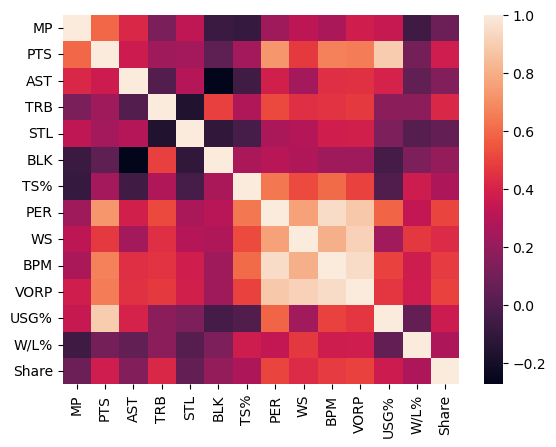

In [272]:
sns.heatmap(df_season.select_dtypes(include=['int64', 'float64']).corr())

<Axes: xlabel='PER', ylabel='Share'>

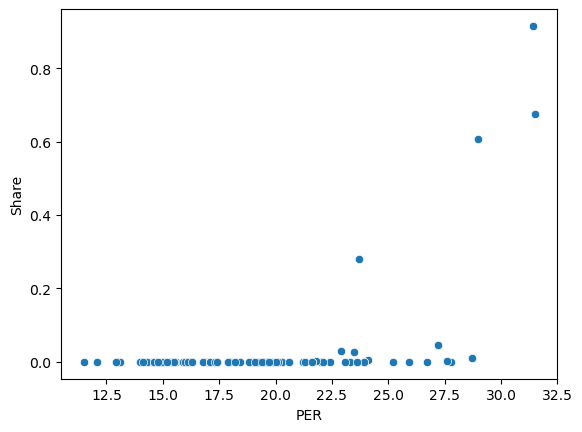

In [274]:
sns.scatterplot(data=df_season, x='PER', y='Share')

In [280]:
df_select = df_season.sort_values(by=['Share'], ascending=False).drop(df_season.index[30: 101])

<Axes: >

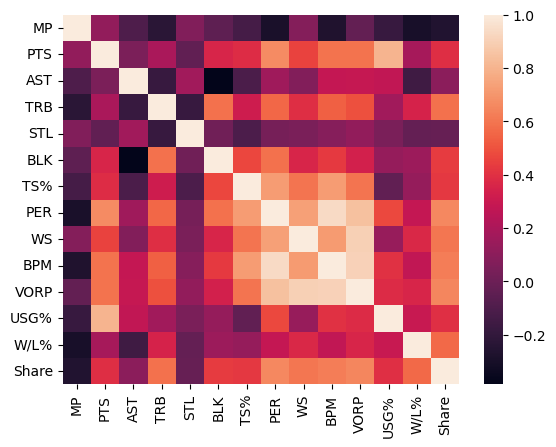

In [282]:
sns.heatmap(data=df_select.select_dtypes(include=['int64', 'float64']).corr())